In [1]:
import os

# Define the Spark version
spark_version = 'spark-3.5.0'
os.environ['SPARK_VERSION'] = spark_version

# Install Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null

# Download and extract Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

# Install Findspark and PySpark
!pip install -q findspark pyspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

# Initialize Findspark
import findspark
findspark.init()

# Start a SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('example').getOrCreate()

# Print Spark version to verify installation
print(f"Spark version: {spark.version}")

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [861 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get

In [2]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("Card Transactions Data") \
    .getOrCreate()

# Verify the Spark session
print("Spark version:", spark.version)


Spark version: 3.5.0


In [3]:
from google.colab import files
uploaded = files.upload()


Saving card_transdata.csv to card_transdata.csv


In [4]:
df = spark.read.csv("card_transdata.csv", header=True, inferSchema=True)


In [5]:
df.createOrReplaceTempView("transactions")


In [6]:
df.createOrReplaceTempView("transactions")
result = spark.sql("SELECT * FROM transactions LIMIT 20")
result.show()


+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
| 57.87785658389723|            0.3111400080477545|            1.9459399775518593|            1.0|      1.0|            0.0|         0.0|  0.0|
|10.829942699255545|           0.17559150228166587|            1.2942188106198573|            1.0|      0.0|            0.0|         0.0|  0.0|
| 5.091079490616996|            0.8051525945853258|           0.42771456119427587|            1.0|      0.0|            0.0|         1.0|  0.0|
|2.2475643282963613|              5.60004354707232|           0.36266257805709584|            1.0|      1.0|            0.0|         1.0

In [7]:
# Load the CSV file into a PySpark DataFrame
df = spark.read.csv('card_transdata.csv', header=True, inferSchema=True)

# Show the first few rows
df.show()

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
| 57.87785658389723|            0.3111400080477545|            1.9459399775518593|            1.0|      1.0|            0.0|         0.0|  0.0|
|10.829942699255545|           0.17559150228166587|            1.2942188106198573|            1.0|      0.0|            0.0|         0.0|  0.0|
| 5.091079490616996|            0.8051525945853258|           0.42771456119427587|            1.0|      0.0|            0.0|         1.0|  0.0|
|2.2475643282963613|              5.60004354707232|           0.36266257805709584|            1.0|      1.0|            0.0|         1.0

In [8]:
# Ready for implementing model
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [13]:
# Define features set
X = df.select([col for col in df.columns if col != "fraud"])
X.show()

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+
| 57.87785658389723|            0.3111400080477545|            1.9459399775518593|            1.0|      1.0|            0.0|         0.0|
|10.829942699255545|           0.17559150228166587|            1.2942188106198573|            1.0|      0.0|            0.0|         0.0|
| 5.091079490616996|            0.8051525945853258|           0.42771456119427587|            1.0|      0.0|            0.0|         1.0|
|2.2475643282963613|              5.60004354707232|           0.36266257805709584|            1.0|      1.0|            0.0|         1.0|
| 44.19093600261837|            0.

In [17]:
import numpy as np

# Define target vector
y = np.array(df.select("fraud").rdd.flatMap(lambda x: x).collect())


In [20]:
import pandas as pd

# Splitting into Train and Test sets
# Convert PySpark DataFrames to Pandas DataFrames
X_pd = X.toPandas()
y_pd = pd.Series(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, random_state=78)

In [21]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [22]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [23]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=78)

In [25]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [26]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [27]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [28]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,228025,0
Actual 1,2,21973


Accuracy Score : 0.999992
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228025
         1.0       1.00      1.00      1.00     21975

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000



In [29]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.509378787033755, 'ratio_to_median_purchase_price'),
 (0.17997694344010037, 'online_order'),
 (0.13602258979652768, 'distance_from_home'),
 (0.0654368886637903, 'used_pin_number'),
 (0.05605144403415697, 'used_chip'),
 (0.04608283219576462, 'distance_from_last_transaction'),
 (0.007050514835905043, 'repeat_retailer')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

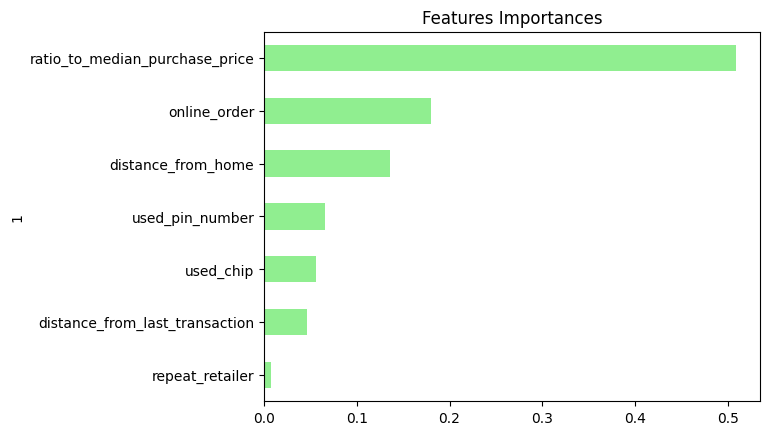

In [30]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [31]:
# KNN test
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

# Display all of the columns
pd.set_option('display.max_columns', None)

In [40]:
KNN_df = spark.read.csv('card_transdata.csv', header=True, inferSchema=True)
pandas_df = KNN_df.toPandas()

pandas_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [41]:
# Split target column from dataset
y = pandas_df['fraud']
X = pandas_df.drop(columns='fraud')

In [42]:
# Preview the data
X[:5]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [43]:
# Print first five entries for target
y[:5]

,fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [44]:
# Preview the data
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [45]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [46]:
X_train.shape

(750000, 7)

In [47]:
X_test.shape

(250000, 7)

In [48]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Instantiate the model with k = 3 neighbours
model = KNeighborsClassifier(n_neighbors=3)

In [50]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[227959,    200],
       [   118,  21723]])

In [53]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    228159
         1.0       0.99      0.99      0.99     21841

    accuracy                           1.00    250000
   macro avg       1.00      1.00      1.00    250000
weighted avg       1.00      1.00      1.00    250000

